In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df=pd.read_csv("dataset.txt",header=None,sep="\s+")
X=df.values.astype(float)
print(X,type(X),X.shape)

[[ 0.85 17.45  2.  ]
 [ 0.75 15.6   2.  ]
 [ 3.3  15.45  2.  ]
 ...
 [38.25 17.35  1.  ]
 [39.5  16.95  1.  ]
 [39.9  17.05  1.  ]] <class 'numpy.ndarray'> (373, 3)


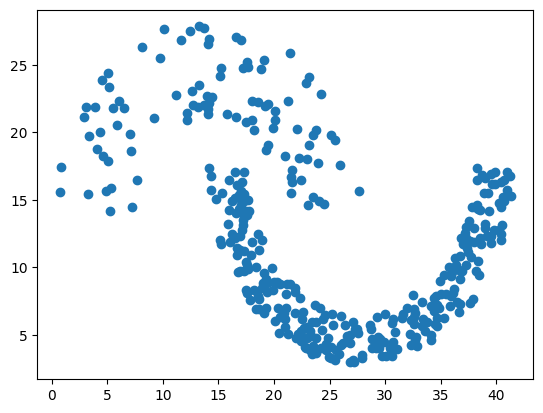

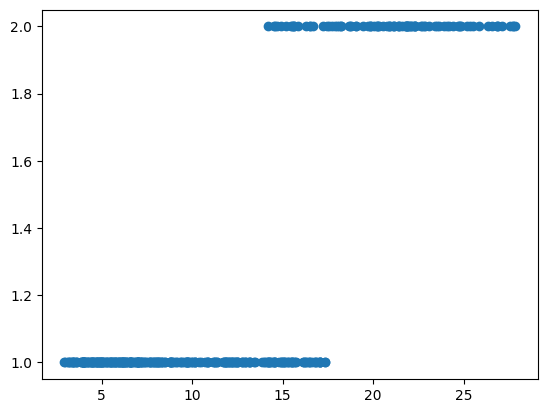

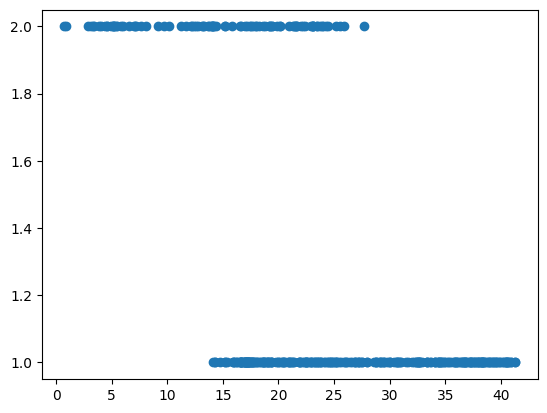

In [3]:
plt.scatter(X[:,0].reshape(-1,1),X[:,1].reshape(-1,1))
plt.show()
plt.scatter(X[:,1].reshape(-1,1),X[:,2].reshape(-1,1))
plt.show()
plt.scatter(X[:,0].reshape(-1,1),X[:,2].reshape(-1,1))
plt.show()

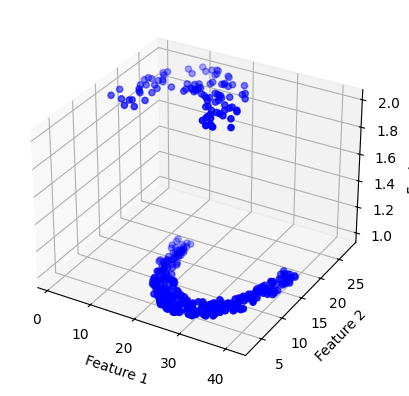

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='b', marker='o')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()


In [31]:
class k_means:
    def __init__(self):
        self.partitions=None
        self.partition_means=None
        self.no_of_partitions=None
        self.x=None

    def random_initialization(self):
        self.partition_means=[]
        n,d=self.x.shape
        for i in range(self.no_of_partitions):
            mins=np.min(self.x,axis=0)
            maxs=np.max(self.x,axis=0)
            mean_i=[]
            for j in range(d):
                random_num=random.uniform(mins[j],maxs[j])
                mean_i.append(random_num)
            self.partition_means.append(mean_i)
        self.partition_means=np.array(self.partition_means)

    def partition_update(self):
        n,d=self.x.shape
        self.partitions=[[] for _ in range(self.no_of_partitions)]
        partitions_distances= np.linalg.norm(
        self.x[:, np.newaxis, :] - self.partition_means[np.newaxis, :, :], axis=2
        )
        for i in range(n):
            arg=np.argmin(partitions_distances[i])
            self.partitions[arg].append(i)
        for i in range(self.no_of_partitions):
            self.partition_means[i]=np.mean(self.x[self.partitions[i]],axis=0)

    def fit(self,x,p,updates):
        self.x=x
        self.no_of_partitions=p
        n,d=x.shape
        self.partitions = [[] for _ in range(self.no_of_partitions)]
        self.random_initialization()
        for i in range(updates):
            self.partition_update()
            print(f"Epoch {i+1}/{updates}")
            print("Current partition means:\n", self.partition_means)
            # Optional: print cluster sizes
            for k in range(self.no_of_partitions):
                print(f"Cluster {k+1} size: {len(self.partitions[k])}")
            print("-" * 40)

    def _3Dplot_for_two_partitions(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot cluster 1 points
        ax.scatter(self.x[self.partitions[0], 0],
                self.x[self.partitions[0], 1],
                self.x[self.partitions[0], 2],
                c='r', marker='o', label='Cluster 1')

        # Plot cluster 2 points
        ax.scatter(self.x[self.partitions[1], 0],
                self.x[self.partitions[1], 1],
                self.x[self.partitions[1], 2],
                c='g', marker='^', label='Cluster 2')

        # Plot centroids
        ax.scatter(self.partition_means[:, 0],
                self.partition_means[:, 1],
                self.partition_means[:, 2],
                c='b', marker='X', s=200, label='Centroids')  # 'X' marker, bigger size

        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Feature 3")
        ax.legend()
        plt.show()

    def _2Dplot_for_two_partitions(self):
        plt.scatter(self.x[self.partitions[0],0],self.x[self.partitions[0],1],c='r')
        plt.scatter(self.x[self.partitions[1],0],self.x[self.partitions[1],1],c='g')
        plt.show()
    
    def performance(self):
        n,d=self.x.shape
        correctc1=np.sum(self.x[self.partitions[0],2]==2)
        correctc2=np.sum(self.x[self.partitions[1],2]==1)
        return (correctc1+correctc2)/n

In [32]:
model=k_means()
model.fit(X,2,9)

Epoch 1/9
Current partition means:
 [[15.31217105 17.98585526  1.61184211]
 [30.53348416  8.12941176  1.01809955]]
Cluster 1 size: 152
Cluster 2 size: 221
----------------------------------------
Epoch 2/9
Current partition means:
 [[15.57253086 17.41759259  1.58024691]
 [31.0549763   8.0985782   1.01421801]]
Cluster 1 size: 162
Cluster 2 size: 211
----------------------------------------
Epoch 3/9
Current partition means:
 [[15.83235294 17.06117647  1.56470588]
 [31.44753695  8.02980296  1.00492611]]
Cluster 1 size: 170
Cluster 2 size: 203
----------------------------------------
Epoch 4/9
Current partition means:
 [[15.92196532 16.90751445  1.55491329]
 [31.60425     8.02725     1.005     ]]
Cluster 1 size: 173
Cluster 2 size: 200
----------------------------------------
Epoch 5/9
Current partition means:
 [[15.97542857 16.79457143  1.54857143]
 [31.71540404  8.03737374  1.00505051]]
Cluster 1 size: 175
Cluster 2 size: 198
----------------------------------------
Epoch 6/9
Current pa

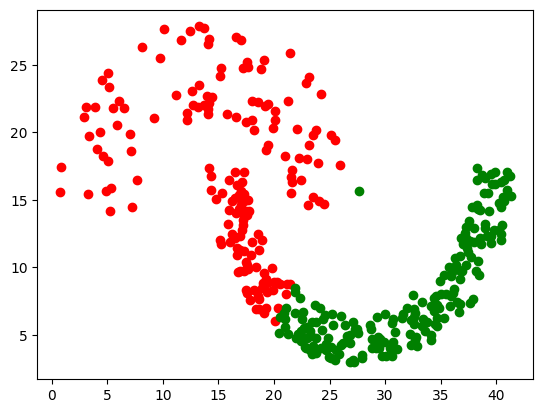

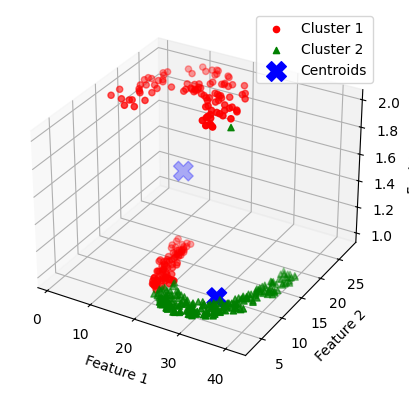

78.55227882037534 %


In [35]:
model._2Dplot_for_two_partitions()
model._3Dplot_for_two_partitions()
print(model.performance()*100 , "%")